In [1]:
#NLP predicting whether a message is spam or not
import nltk

In [3]:
import pandas  as pd

In [9]:
messages=[]
for lines in open('smsspamcollection/SMSSpamCollection'):
    messages.append(lines.strip())       #we also must strip out the insignifucant pre and post data around the string

In [13]:
messages # now we can see they are tab seperated, basically 5000 string values

['ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
 'ham\tOk lar... Joking wif u oni...',
 "spam\tFree entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
 'ham\tU dun say so early hor... U c already then say...',
 "ham\tNah I don't think he goes to usf, he lives around here though",
 "spam\tFreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv",
 'ham\tEven my brother is not like to speak with me. They treat me like aids patent.',
 "ham\tAs per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune",
 'spam\tWINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Cl

In [17]:
# we can see that these are tab seperated values so we can easily get these
df=pd.read_csv('smsspamcollection/SMSSpamCollection', sep='\t',names=['label','messages'])

In [22]:
df.describe()  # basically we have two coloumns labels and messages two labels ham or spam

,label,messages
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [30]:
df.shape
df.groupby('label').count()

,messages
label,
ham,4825
spam,747


In [33]:
#now we want to plot the values
# how long the text messages are
df['length']=df['messages'].apply(len)

In [35]:
df['length'].max()

910

In [38]:
#now lets visualize some data
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline


In [39]:
allham=df[df['label']=='ham']
allspam=df[df['label']=='spam']

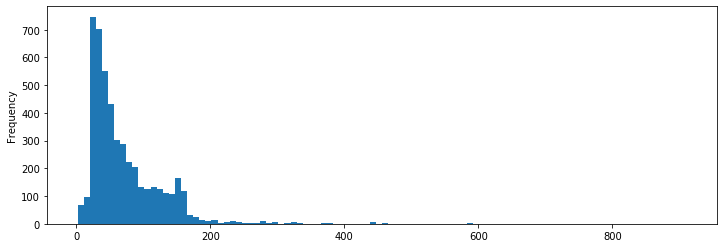

In [50]:
#plot taking a single attribute
allham['length'].plot(kind='hist',bins=100,figsize=(12,4))  # we can see both hamm messsages lie between 0-->100

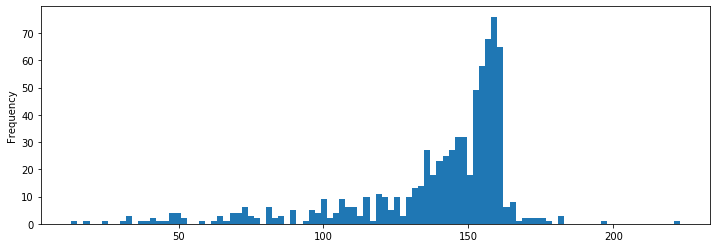

In [52]:
allspam['length'].plot(kind='hist',bins=100,figsize=(12,4)) # most are between 150

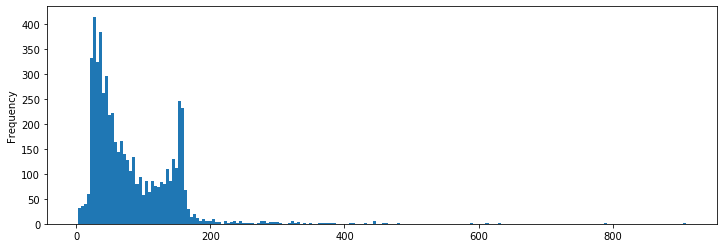

In [77]:
df['length'].plot(kind='hist',bins=200,figsize=(12,4)) #almost bi- modal

In [85]:
#now we can not feed text data to ML algos so we need to convert the text into numerical vectors
#text preprocessing
import string
nltk.download_shell()  #download the stop words
from nltk.corpus import stopwords  #stop words has the list of all the commonly used words

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


In [86]:
#remove all the punctuation
def textprocess(msg):
    #remove the punctuations 
    punc=[]
    for char in msg:
        if char not in string.punctuation:
            punc.append(char)
    punc="".join(punc)
    #remove the common words
    res=[]
    for char in punc.split():
        if char.lower() not in stopwords.words("english"):
            
             res.append(char)
    return res
        
    
    

In [92]:
df['messages'].head().apply(textprocess)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: messages, dtype: object

In [93]:
#we have to vectorize the text 
from sklearn.feature_extraction.text import CountVectorizer

In [94]:
count=CountVectorizer(analyzer=textprocess).fit(df['messages']) 

In [99]:
# A vector with as many dimensiona as there are unique words in the sentence
# create a vocabulary of words and for each message a vector of the length of that vocabulary is created  if the
#the word is present in the sentence it is marked by one other wise marked by a zero
len(count.vocabulary_) # we can see the length of vocalbulary

11425

In [100]:
count.vocabulary_   # here count represents the bag of words
#counts each word with its frequency and we can use this to transform our texts to sparse matrix now

{'Go': 2060,
 'jurong': 7555,
 'point': 8917,
 'crazy': 5769,
 'Available': 1110,
 'bugis': 5218,
 'n': 8336,
 'great': 6937,
 'world': 11163,
 'la': 7668,
 'e': 6217,
 'buffet': 5217,
 'Cine': 1483,
 'got': 6906,
 'amore': 4653,
 'wat': 10965,
 'Ok': 3064,
 'lar': 7701,
 'Joking': 2451,
 'wif': 11072,
 'u': 10698,
 'oni': 8590,
 'Free': 1941,
 'entry': 6331,
 '2': 423,
 'wkly': 11123,
 'comp': 5619,
 'win': 11084,
 'FA': 1833,
 'Cup': 1551,
 'final': 6557,
 'tkts': 10512,
 '21st': 443,
 'May': 2804,
 '2005': 430,
 'Text': 3953,
 '87121': 871,
 'receive': 9252,
 'questionstd': 9159,
 'txt': 10686,
 'rateTCs': 9200,
 'apply': 4731,
 '08452810075over18s': 73,
 'U': 4068,
 'dun': 6204,
 'say': 9554,
 'early': 6222,
 'hor': 7186,
 'c': 5261,
 'already': 4629,
 'Nah': 2948,
 'dont': 6123,
 'think': 10433,
 'goes': 6877,
 'usf': 10799,
 'lives': 7842,
 'around': 4777,
 'though': 10450,
 'FreeMsg': 1943,
 'Hey': 2222,
 'darling': 5864,
 '3': 543,
 'weeks': 11011,
 'word': 11150,
 'back': 4893

In [126]:
bow_trans=count.transform(df['messages'])

In [127]:
bow_trans.shape # for every sentence we created a vector of dimension 11425

(5572, 11425)

In [128]:
#now here we have a sparse matrix made of the sentences  we can also check the sparsity
bow_trans.nnz  ##total nonzeros and all other are zeros

50548

In [129]:
#The result of this? Really huge and sparse vectors that capture absolutely no relational information.
# there is no relation between the information we can use tf-idf for finding some kind of relation

In [130]:
from sklearn.feature_extraction.text import TfidfTransformer

In [133]:
tfidf=TfidfTransformer().fit(bow_trans)

In [134]:
transformed=tfidf.transform(bow_trans)  # this is our final data and we will train our model on this

In [140]:
from sklearn.model_selection import train_test_split

In [141]:
X_train, X_test, y_train, y_test= train_test_split(transformed,df['label'])

In [144]:
from sklearn.naive_bayes import MultinomialNB

In [145]:
model=MultinomialNB()

In [146]:
model.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [150]:
pred=model.predict(X_test)
print(pred)

['ham' 'ham' 'ham' ... 'ham' 'ham' 'ham']


In [152]:
from sklearn.metrics import classification_report

In [155]:
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

         ham       1.00      0.96      0.98      1279
        spam       0.71      1.00      0.83       114

    accuracy                           0.97      1393
   macro avg       0.85      0.98      0.91      1393
weighted avg       0.98      0.97      0.97      1393



In [ ]:
# so here are our results